In [1]:
# SIGH
# -Kai
#
# github.com/kaibrooks

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
# use tensorflow and keras as a high-level api to make it faster to get something running
import tensorflow as tf
import threading
import scipy
import PIL # this imports Pillow, but for some dumb reason needs 'PIL'
from PIL import Image
import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from datetime import datetime # so we know how much time we've wasted
import matplotlib.pyplot as plt # fancy plots
from keras.models import load_model
import h5py
import numpy as np
import matplotlib.pyplot as plt # plot things

import os

# might be good to know
print('TensorFlow version', tf.__version__)
print('Keras version', keras.__version__)
print('SciPy version', scipy.__version__)
print('Numpy version', np.__version__) 
print('Pillow version', PIL.__version__) 

TensorFlow version 2.0.0
Keras version 2.3.1
SciPy version 1.3.3
Numpy version 1.17.4
Pillow version 6.2.1


Using TensorFlow backend.


In [3]:
## vars
batch_size = 16
imsize = 64

In [4]:
## load the model

model = tf.keras.models.load_model('trained_models/trainedmodel.h5')

print('Loaded', model)

Loaded <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc30855b048>


In [5]:
## setup crap
class_names = ['blue','cheese','pink']

datagen = ImageDataGenerator(rescale = 1. / 255) # force images to be square

test_it = datagen.flow_from_directory('data/test/', class_mode='categorical', batch_size=batch_size, target_size=(imsize, imsize))

Found 54 images belonging to 3 classes.


In [6]:
## score trained model
(test_images, test_labels) = test_it.next()
scores = model.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

16/1 - 0s - loss: 0.0021 - accuracy: 1.0000
Test loss: 0.002135742688551545
Test accuracy: 1.0


In [7]:
## make a single prediction
predictions = model.predict(test_images) # load the data
predictions[0] # predict the [0]th element, this outputs an array with each element being the confidence of being that class
print('Class confidence for image 0:', predictions[0])
print('\nPrediction  :', np.argmax(predictions[0])) # output the most likely prediction
print('Actual class:', np.argmax(test_labels))  # output what the answer actually is)

Class confidence for image 0: [0.01690509 0.01649137 0.9666036 ]

Prediction  : 2
Actual class: 2


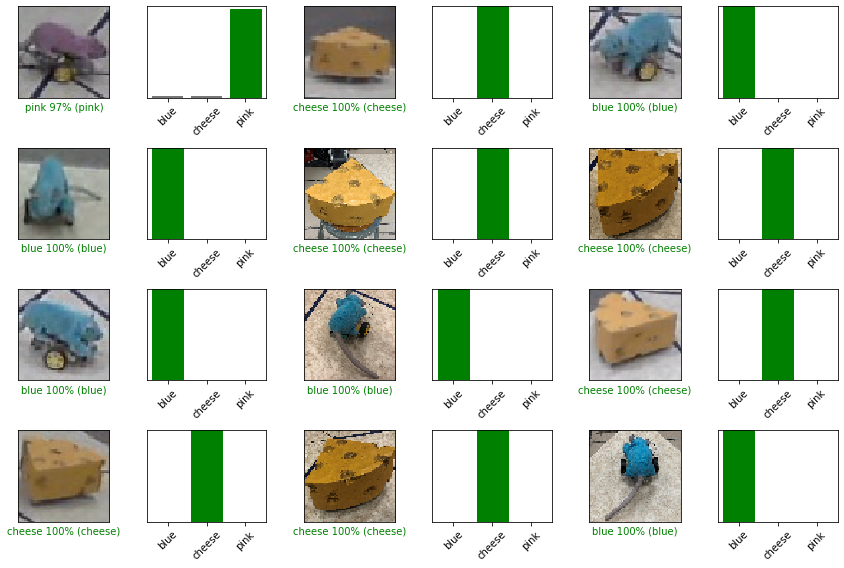

In [8]:
## make a pinterest board of images and their classifications
# set up first
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(len(class_names)))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('green')

## plot a single image and its prediction
#i = 0
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
#plt.show()

# lets do another
#i = 12
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
#plt.show()

## show a bunch of predicted images and display a grid
num_rows = 4 # increase this to show more
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  _ = plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.tight_layout()
plt.show()